In [9]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
date = 'Дата замера'
hole = 'Скважина'
x1 = 'method'
x2 = 'mode'
X = (x1, x2)
y1 = 'Рпр(ТМ)'
y2 = 'Рзаб(Рпр)'
y3 = 'Рзаб(Нд)'
y4 = 'Рзаб(иссл)'
Y = (y1, y2, y3, y4)
def load_some_data(path, separ = ':'):
    return pd.read_csv(path, sep=separ, parse_dates = [date], index_col = date,  encoding='cp1251')


In [10]:
df = load_some_data('data2.csv')
df.describe()
df.columns = ['hole','method','mode', 'TM','rpr', 'nd', 'issl']
df
cats_x1 = df[x1].astype('category').cat.categories
df[x1] = df[x1].astype('category').cat.codes
cats_x2 = df[x2].astype('category').cat.categories
df[x2] = df[x2].astype('category').cat.codes
#df = df.dropna(0)
#df =  df.drop_duplicates()
df

,hole,method,mode,TM,rpr,nd,issl
Дата замера,,,,,,,
2018-01-01,1,-1,2,NaN,NaN,44.2,55.0
2018-01-02,1,-1,2,NaN,NaN,43.0,55.0
2018-01-03,1,-1,2,NaN,NaN,44.2,55.0
2018-01-04,1,-1,2,NaN,NaN,44.2,55.0
2018-01-05,1,-1,2,NaN,NaN,44.2,55.0
2018-01-06,1,-1,2,NaN,NaN,44.2,55.0
2018-01-07,1,-1,2,NaN,NaN,44.2,55.0
2018-01-08,1,-1,2,NaN,NaN,44.2,55.0
2018-01-09,1,-1,2,NaN,NaN,44.2,55.0


In [7]:
df.to_csv('res')

In [41]:
from sklearn import preprocessing


def normalize_col(df, cols):
    res = df.copy()
    for col in cols:
        x = res[col].values #returns a numpy array
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        res[col] = pandas.DataFrame(x_scaled)

In [34]:
%matplotlib inline
def draw_plot(name_hole, data_to_draw, what_to_do ='see'):
    formatter = ticker.FormatStrFormatter('%.0f')
    fig, axes = plt.subplots(1,2)
    for y in Y:
        axes[0].plot(data_to_draw[y], label = y)
    axes[0].legend()
    axes[0].set_title('Измерения давлений')
    axes[0].set_xlabel(data, fontsize = 12)
    axes[0].set_ylabel('P', fontsize = 12)
    
    axes[1].plot(data_to_draw[x1], label = x1)
    axes[1].plot(data_to_draw[x2], label = x2)
    axes[1].set_title(x1 + 'and' + x2)
    axes[1].legend()
    axes[1].set_xlabel(data, fontsize = 12)
    axes[1].set_ylabel('№', fontsize = 12)
    axes[1].yaxis.set_major_formatter(formatter)
    fig.set_figwidth(15)
    fig.set_figheight(8)
    fig.suptitle(hole + ' ' + str(name_hole))
    plt.legend()
    if (what_to_do == 'save'):
        plt.savefig(create_directory('diagrams') + '/' + name_hole + '.png',
                    dpi = 100, format = 'png')
    else:
        plt.show()

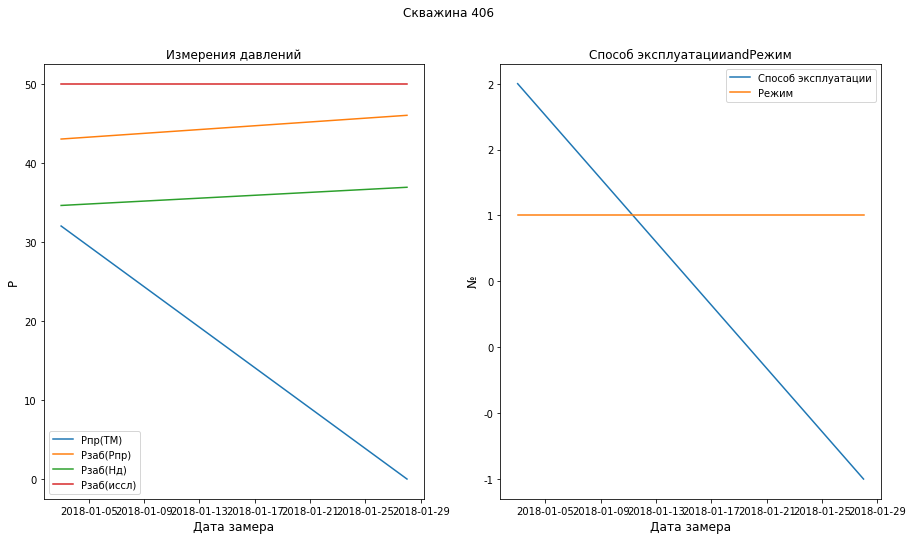

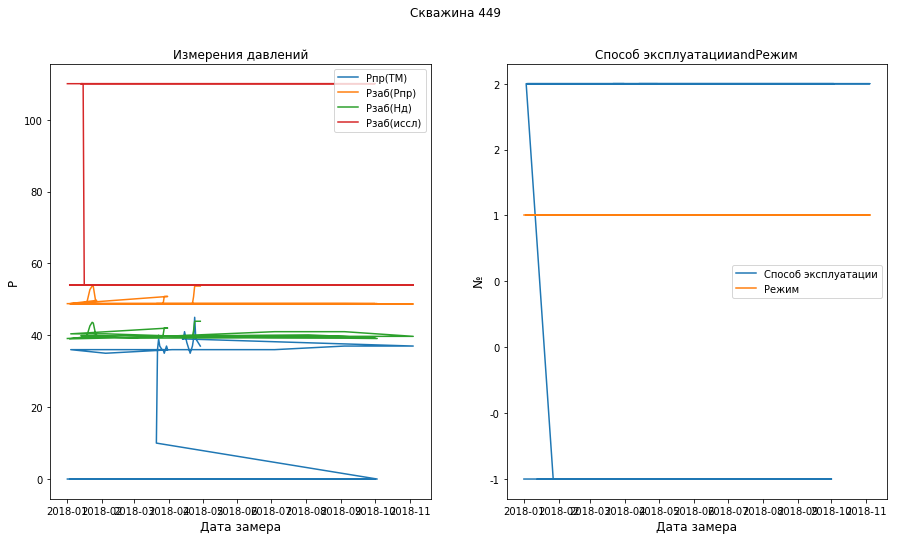

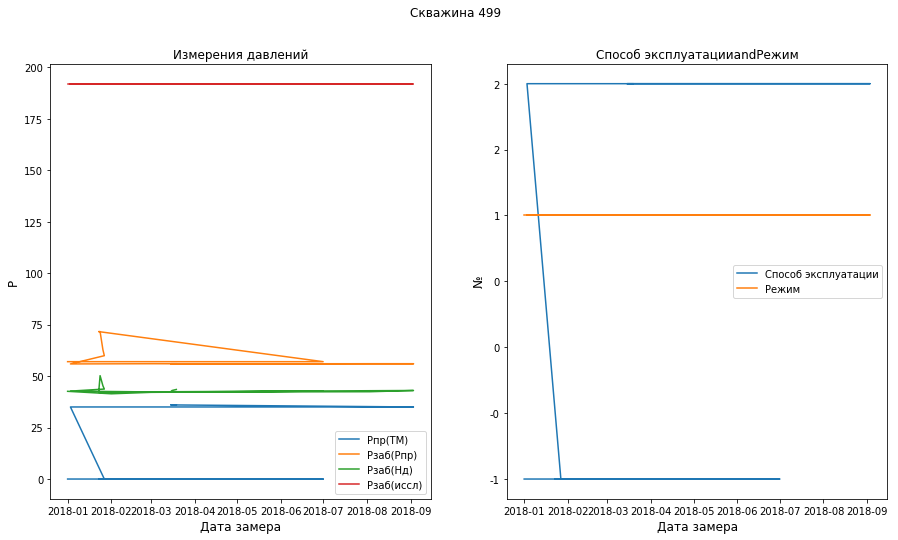

In [43]:
for hol in df[hole].unique():
    draw_plot(hol, df[df[hole] == hol])

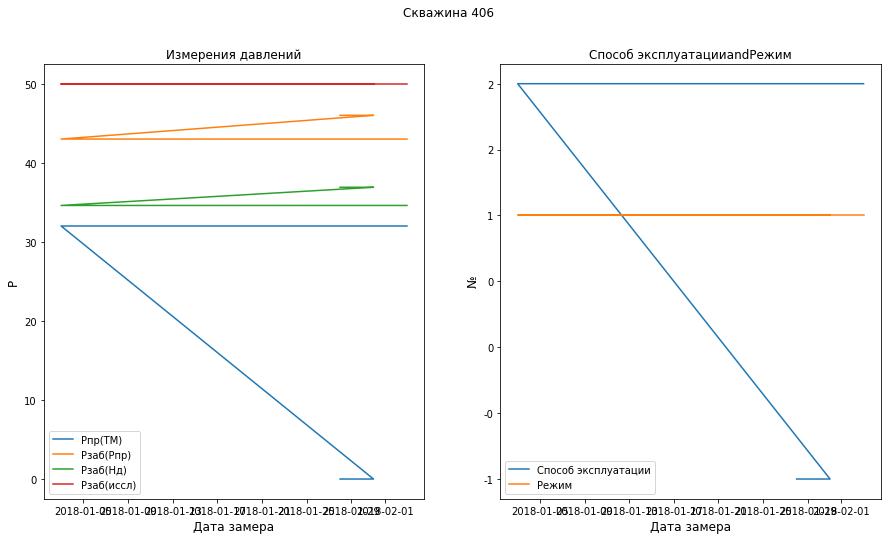

In [39]:
draw_plot(406, df[df[hole] == 406])